In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
y=iris.pop('species')
X= iris

In [2]:
from sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출
classle=LabelEncoder()
y=classle.fit_transform(y)#범주형 변수 숫자로 치환

from sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

# SVM

- kernel: 커널함수
    - 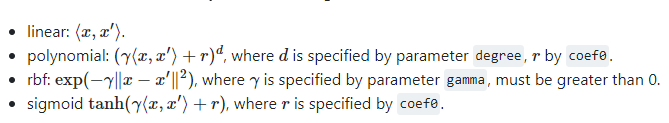
- C: Regularization parameter, 값을 높이면 서포트 벡터를 잘 분류함
- Gamma: 멀리 있는 요소들에 대한 가중치

In [3]:
#7.3 Python을 이용한 SVM
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train.iloc[:,:2],y_train) #SVM추정
y_train_pred=svm.predict(X_train.iloc[:,:2]) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test.iloc[:,:2])  #test set의 y예측치 구하기

In [4]:
import numpy as np
x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
unit = 0.005
xx,yy = np.meshgrid(np.arange(x_min,x_max,unit),np.arange(y_min,y_max,unit))

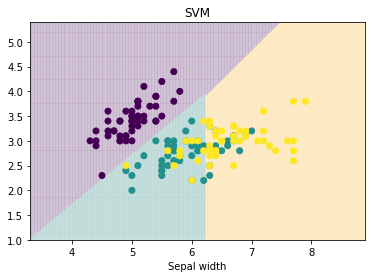

정확도: 0.82


In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.01)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
plt.xlabel('Sepal length')
plt.xlabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('SVM')
plt.show()
print('정확도:',svm.score(X=X.iloc[:,:2],y=y))

In [6]:
def viz_svm(kernel='linear', c=1, gamma='scale'):
    svm=SVC(kernel=kernel, C=c,gamma=gamma, random_state=1123)
    svm.fit(X_train.iloc[:,:2],y_train) #SVM추정
    y_train_pred=svm.predict(X_train.iloc[:,:2]) #train set의 y 예측치 구하기
    y_test_pred=svm.predict(X_test.iloc[:,:2])  #test set의 y예측치 구하기
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
    unit = 0.005
    xx,yy = np.meshgrid(np.arange(x_min,x_max,unit),np.arange(y_min,y_max,unit))
    z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,z,alpha=0.01)
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
    plt.xlabel('Sepal length')
    plt.xlabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.title('SVM')
    plt.show()
    print('정확도:',svm.score(X=X.iloc[:,:2],y=y))

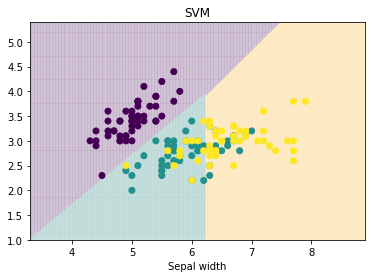

정확도: 0.82


In [7]:
viz_svm('linear', 1,'scale')

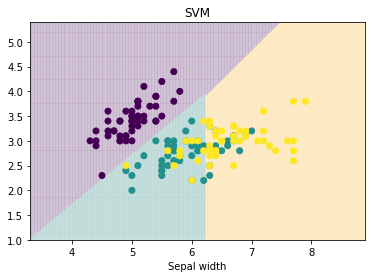

정확도: 0.82


In [8]:
viz_svm('linear', 1,'auto')

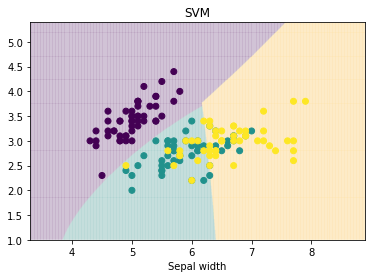

정확도: 0.8266666666666667


In [9]:
viz_svm('rbf', 1,'scale')

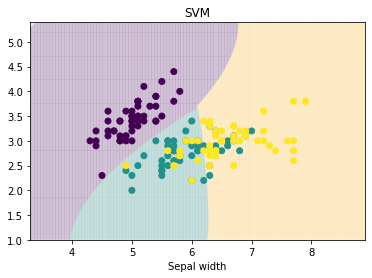

정확도: 0.82


In [10]:
viz_svm('rbf', 0.1,'auto')

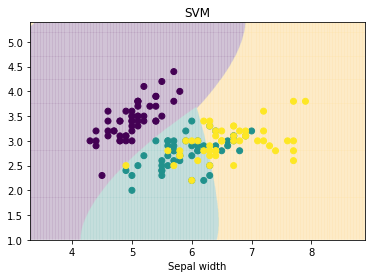

정확도: 0.8333333333333334


In [12]:
viz_svm('rbf', 0.3,'auto')

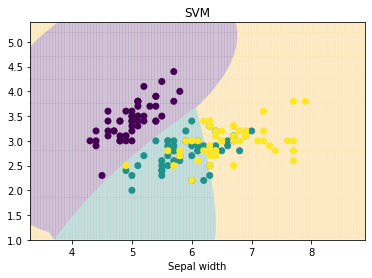

정확도: 0.8333333333333334


In [11]:
viz_svm('rbf', 0.5,'auto')

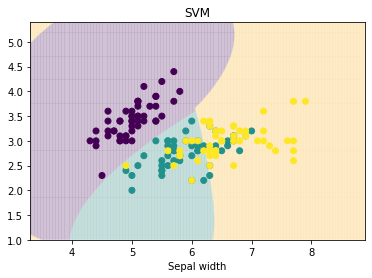

정확도: 0.8266666666666667


In [13]:
viz_svm('rbf', 0.7,'auto')